<b>-------------------------------------References--------------------------------------</b>

Exploratory Data Analysis on Stroke Dataset : https://towardsdatascience.com/step-by-step-exploratory-data-analysis-on-stroke-dataset-840aefea8739
<br/>
Stroke Analysis with Decision Trees : https://www.kaggle.com/code/tbourton/stroke-analysis-with-decision-trees/notebook

<b>#-----------------------------------------Healthcare dataset -----------------------------------------------#</b>

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

In [37]:
#Import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

<b>####################################################Data Collection & Loading#########################################################</b>

In [38]:
#Load Training Dataset
training_data= pd.read_csv("healthcare-dataset-stroke-data.csv")
#training_data= pd.read_csv("train_ver2.csv")
training_data.head(n=5)
#Load Testing  Dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<b>########################################################Data Preparation####################################################</b>

<b>--------------------Generate Descriptive Statistics----------------------</b>

In [4]:
# 1. There are some Null values in the bmi column. Since its count does not match with the total rows of the column
# 2. The average (mean) age of the patient is 43 in the given dataset
# 3. The average (mean)  of hypertension column and heart_disease column is significantly lower than 0.5
training_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<b>---------------------------Check Data Types----------------------------</b>

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<b>----------------------Identify Missing Values -----------------------</b>

In [39]:
numeric_vars = training_data.columns[training_data.dtypes != 'object']
categorical_vars = training_data.columns[training_data.dtypes == 'object']
print('--------------numerical columns--------------------')
print(numeric_vars)
print('--------------categorical_ columns--------------------')
print(categorical_vars)

# List out columns and their counts of missing values - sorted 
print('--------------Numerical Counts of Missing Values ( Sorted ) --------------------')
print(training_data[numeric_vars].isnull().sum().sort_values(ascending=False))

print('--------------Categorical Counts of Missing Values --------------------')
print(training_data[categorical_vars].isnull().sum().sort_values(ascending=False))

--------------numerical columns--------------------
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
--------------categorical_ columns--------------------
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
--------------Numerical Counts of Missing Values ( Sorted ) --------------------
bmi                  201
id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
stroke                 0
dtype: int64
--------------Categorical Counts of Missing Values --------------------
gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64


<b>-------------------------------------Cleaning & Removing Unwanted Data Values : Find & Replace Unknown Values----------------------</b>

In [40]:
# Breakup of Target Variable : 4861 / 249 ( Stroke vs No-Stroke)
training_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<b>-------------------------------------Fix Missing Values ----------------------</b>

In [41]:
#---------------------BMI------------------------------------#
# 1. 201 records BMI = 'N/A'.
# 2. 161 Records BMI = 'N/A' and Stroke = 0 , which is 80% of the Records.  
# 3. Hence, records with empty value in BMI was replaced with mean of BMI

# Find BMI N/A Records that have Stroke Patients 
# training_data.loc[(training_data['bmi'].isnull()) & (training_data['stroke'] == 0)]

#Imputing Values ( Numercial Columns)  - Typically done via Mean - bmi 
mean_value = training_data['bmi'].mean()
training_data['bmi'].fillna(mean_value, inplace = True)

# ------------------------Gender ----------------------------#
# 1. There were 1 patients who were categorized as ‘Other’ in the gender column. 
# 2. They were dropped because their size was insignificant to the dataset 
genderRows = training_data[training_data['gender'] == 'Other'].index 
training_data.drop(genderRows, inplace=True)

#---------------------Smoking Status -----------------------#
# 1. 1544 Records with smoking_status = 'unknown'
# 2. 1497/4861 = 30% of Stroke Patients
# 3. These Unknown Records cannot be ignored or dropped off. 
# 4. Linear Regression can be used to impute value because of Accuracy
#    4.a Convert Categorical Values into Numerical Values 
#    4.b Convert smoking_status unknown values into NAN
#    4.c Convert Categorical Variables into Numeric Values 
#    4.c Predict Smoking_status uunknown values using linear Regression  
#training_data.loc[(training_data['bmi'].isnull()) & (training_data['smoking_status'] =='Unknown')]

<b>------------------------Convert Categorical Values to Numerical Values-------------------------------</b>

In [42]:
# 4.a Convert Categorical Values into Numerical Values 
lbl=preprocessing.LabelEncoder()
training_data['gender'] = lbl.fit_transform(training_data['gender'])
training_data['ever_married'] = lbl.fit_transform(training_data['ever_married'])
training_data['work_type'] = lbl.fit_transform(training_data['work_type'])
training_data['Residence_type'] = lbl.fit_transform(training_data['Residence_type'])

In [43]:
# 4.b Convert Unknown Values into NAN
training_data['smoking_status'].mask(training_data['smoking_status'] == 'Unknown', np.nan, inplace=True)

# Checkpoint : Get Count of NAN rows by Count()  
training_data.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [92]:
training_data.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int32  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int32  
 6   work_type          5109 non-null   int32  
 7   Residence_type     5109 non-null   int32  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     3565 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 439.1+ KB


In [44]:
# 4.c Convert Categorical Variable into numerical Values
training_data['smoking_status'] = lbl.fit_transform(training_data['smoking_status'])

<b>------------------------Remove Non Critical Columns-------------------------------</b>

In [45]:
#Remove Id 
training_data.drop(columns=['id'], inplace=True)

<AxesSubplot:>

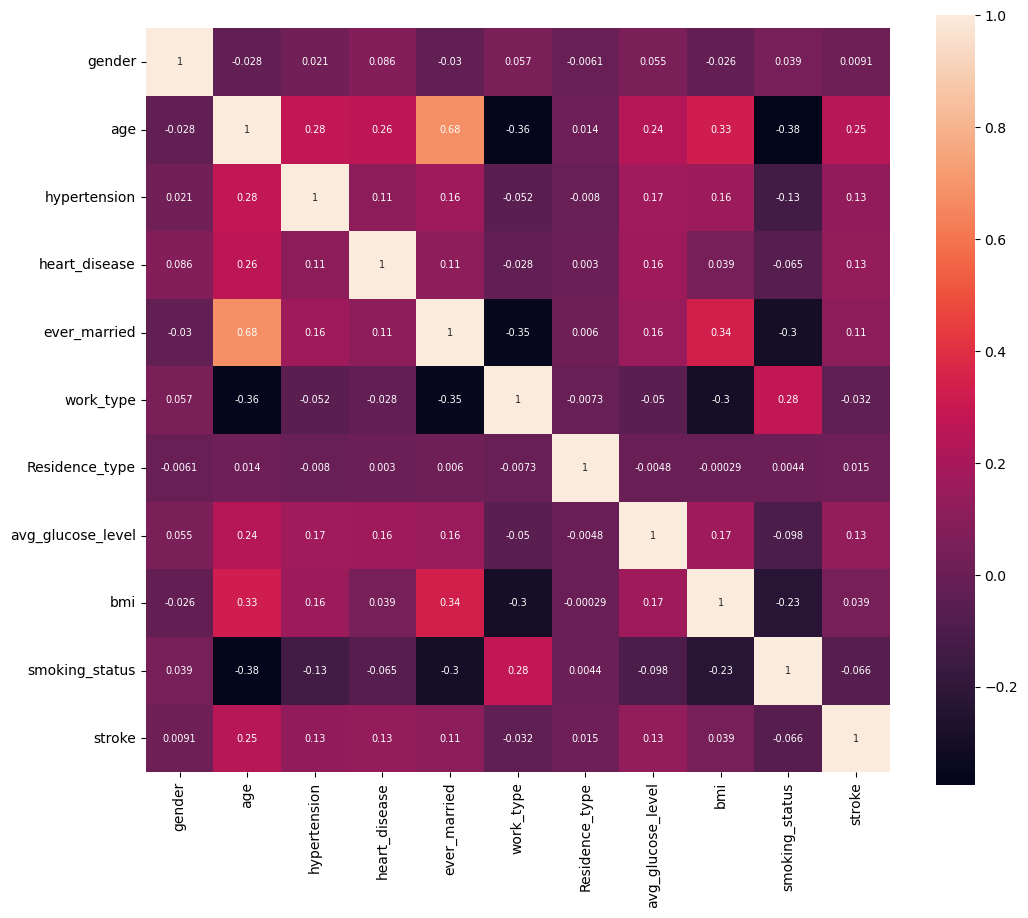

In [46]:
# Check: Get Unique Values 
#training_data["smoking_status"].unique()

# Check: Check Encoded values for Unknown Values   
#training_data.loc[training_data['smoking_status'] == 3]

# Correlation heatmap
plt.figure(figsize=(12, 10))
heart_stroke_corr = training_data.corr()
sns.heatmap(heart_stroke_corr,xticklabels=heart_stroke_corr.columns, yticklabels=heart_stroke_corr.columns, annot=True, annot_kws={"size": 7}, square=True)

<b>----------------------------Remove Columns with negative Correlation-----------------------------------</b> 

In [47]:
training_data.drop(columns=['gender'], inplace=True)
training_data.drop(columns=['work_type'], inplace=True)
training_data.drop(columns=['Residence_type'], inplace=True)
#training_data.drop(columns=['bmi'], inplace=True)

<AxesSubplot:>

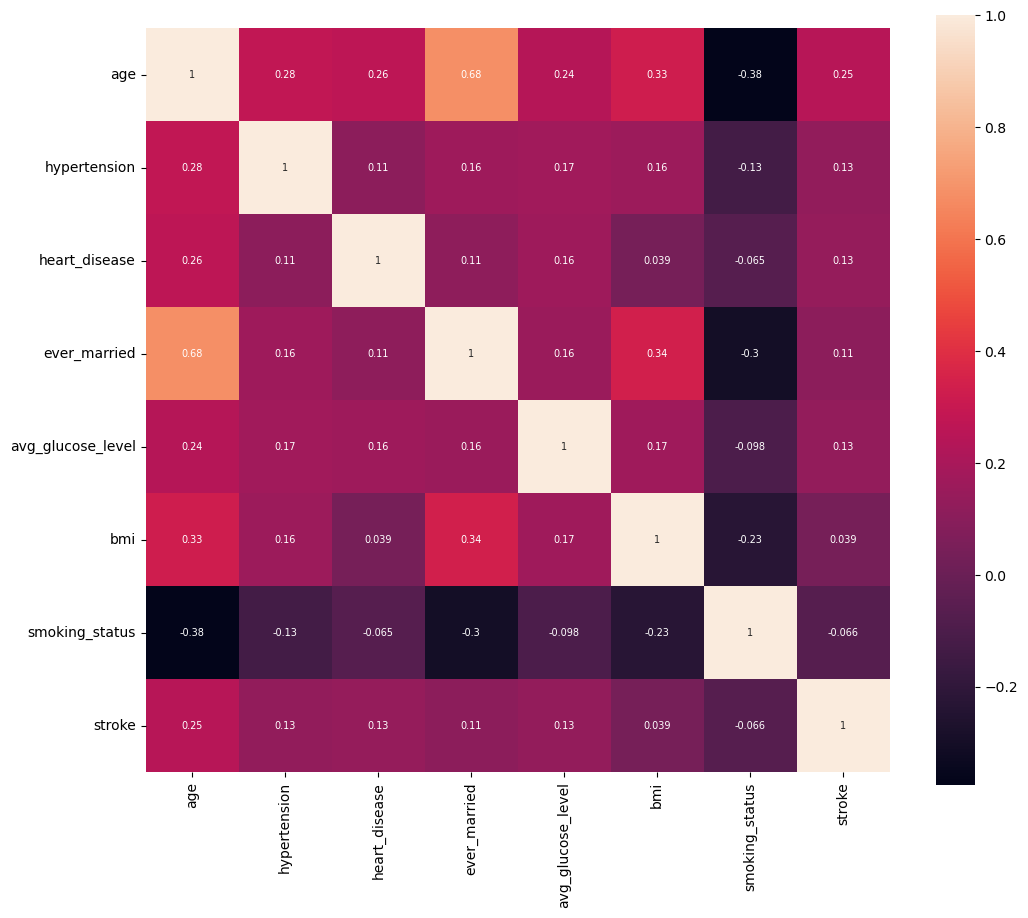

In [48]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
heart_stroke_corr = training_data.corr()
sns.heatmap(heart_stroke_corr,xticklabels=heart_stroke_corr.columns, yticklabels=heart_stroke_corr.columns, annot=True, annot_kws={"size": 7}, square=True)

<b>#-------------------------------Fix Missing Values ( Categorical Variables)-----------------------#</b>

<i>------------------------Encode Dependent and Independent Variables --------------------------</i>

In [31]:
# 1. All Dependent Variables are already Encoded using LabelEncoder
# 2. Typically Independent Variables - One Hot Encoded and Dependent Variables are Label Encoded
# 3. If we need to revisit on #2 will do later

<i>------------Seperate Missing Records as 'Test Data'-----------------------</i>

In [49]:
test_df = training_data.loc[training_data['smoking_status'] == 3]
test_df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
8,59.0,0,0,1,76.15,28.893237,3,1
9,78.0,0,0,1,58.57,24.200000,3,1
13,78.0,0,1,1,219.84,28.893237,3,1
19,57.0,0,1,0,217.08,28.893237,3,1
23,82.0,0,1,1,208.30,32.500000,3,1
...,...,...,...,...,...,...,...,...
5098,9.0,0,0,0,71.88,17.500000,3,0
5101,45.0,0,0,1,97.95,24.500000,3,0
5103,18.0,0,0,0,82.85,46.900000,3,0
5104,13.0,0,0,0,103.08,18.600000,3,0


<i>------------Seperate Non-Missing Records as 'Training Data'---------------</i>

In [50]:
train_df = training_data.loc[training_data['smoking_status'] != 3]
train_df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,228.69,36.600000,0,1
1,61.0,0,0,1,202.21,28.893237,1,1
2,80.0,0,1,1,105.92,32.500000,1,1
3,49.0,0,0,1,171.23,34.400000,2,1
4,79.0,1,0,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...
5102,57.0,0,0,1,77.93,21.700000,1,0
5105,80.0,1,0,1,83.75,28.893237,1,0
5106,81.0,0,0,1,125.20,40.000000,1,0
5107,35.0,0,0,1,82.99,30.600000,1,0


<i>------------Seperate Dependent & Independent Variables---------------</i>

In [51]:
# move smoking_status column to beginning 
train_df = train_df.loc[:,['smoking_status','age','hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke']]
#train_df

# Independent Variables
X_train = train_df.iloc[:, 1:8]
X_train

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,67.0,0,1,1,228.69,36.600000,1
1,61.0,0,0,1,202.21,28.893237,1
2,80.0,0,1,1,105.92,32.500000,1
3,49.0,0,0,1,171.23,34.400000,1
4,79.0,1,0,1,174.12,24.000000,1
...,...,...,...,...,...,...,...
5102,57.0,0,0,1,77.93,21.700000,0
5105,80.0,1,0,1,83.75,28.893237,0
5106,81.0,0,0,1,125.20,40.000000,0
5107,35.0,0,0,1,82.99,30.600000,0


In [52]:
# dependent Variables
y_train = train_df.iloc[:, 0]
y_train

0       0
1       1
2       1
3       2
4       1
       ..
5102    1
5105    1
5106    1
5107    1
5108    0
Name: smoking_status, Length: 3565, dtype: int32

<i>------------Fit our Logistic Regression model---------------</i>

In [53]:
y = train_df['smoking_status']
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_df.drop("smoking_status",axis=1,inplace=True)

<i>------------Predict our Logistic Regression model---------------</i>

In [54]:
test_df.drop("smoking_status",axis=1,inplace=True)
predictedFeature= lr.predict(test_df)
test_df['smoking_status']= predictedFeature
train_df['smoking_status']=y
test_df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status
8,59.0,0,0,1,76.15,28.893237,1,1
9,78.0,0,0,1,58.57,24.200000,1,1
13,78.0,0,1,1,219.84,28.893237,1,0
19,57.0,0,1,0,217.08,28.893237,1,1
23,82.0,0,1,1,208.30,32.500000,1,0
...,...,...,...,...,...,...,...,...
5098,9.0,0,0,0,71.88,17.500000,0,1
5101,45.0,0,0,1,97.95,24.500000,0,1
5103,18.0,0,0,0,82.85,46.900000,0,1
5104,13.0,0,0,0,103.08,18.600000,0,1


In [47]:
train_df

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status
0,1.051242,0,1,1,2.706450,1.001041,1,0
1,0.785889,0,0,1,2.121652,-0.000165,1,1
2,1.626174,0,1,1,-0.004867,0.468399,1,1
3,0.255182,0,0,1,1.437473,0.715233,1,2
4,1.581949,1,0,1,1.501297,-0.635858,1,1
...,...,...,...,...,...,...,...,...
5102,0.608986,0,0,1,-0.623013,-0.934657,0,1
5105,1.626174,1,0,1,-0.494481,-0.000165,0,1
5106,1.670400,0,0,1,0.420922,1.442744,0,1
5107,-0.363976,0,0,1,-0.511266,0.221565,0,1


In [55]:
# rejoin the Datasets 
training_data = pd.concat([train_df, test_df], axis=0)

#Rearrange Columns 
training_data = training_data.loc[:,['age','hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
training_data

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,228.69,36.600000,0,1
1,61.0,0,0,1,202.21,28.893237,1,1
2,80.0,0,1,1,105.92,32.500000,1,1
3,49.0,0,0,1,171.23,34.400000,2,1
4,79.0,1,0,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...
5098,9.0,0,0,0,71.88,17.500000,1,0
5101,45.0,0,0,1,97.95,24.500000,1,0
5103,18.0,0,0,0,82.85,46.900000,1,0
5104,13.0,0,0,0,103.08,18.600000,1,0


<b>--------------------------------Checking Correlation---------------------------</b>

<AxesSubplot:>

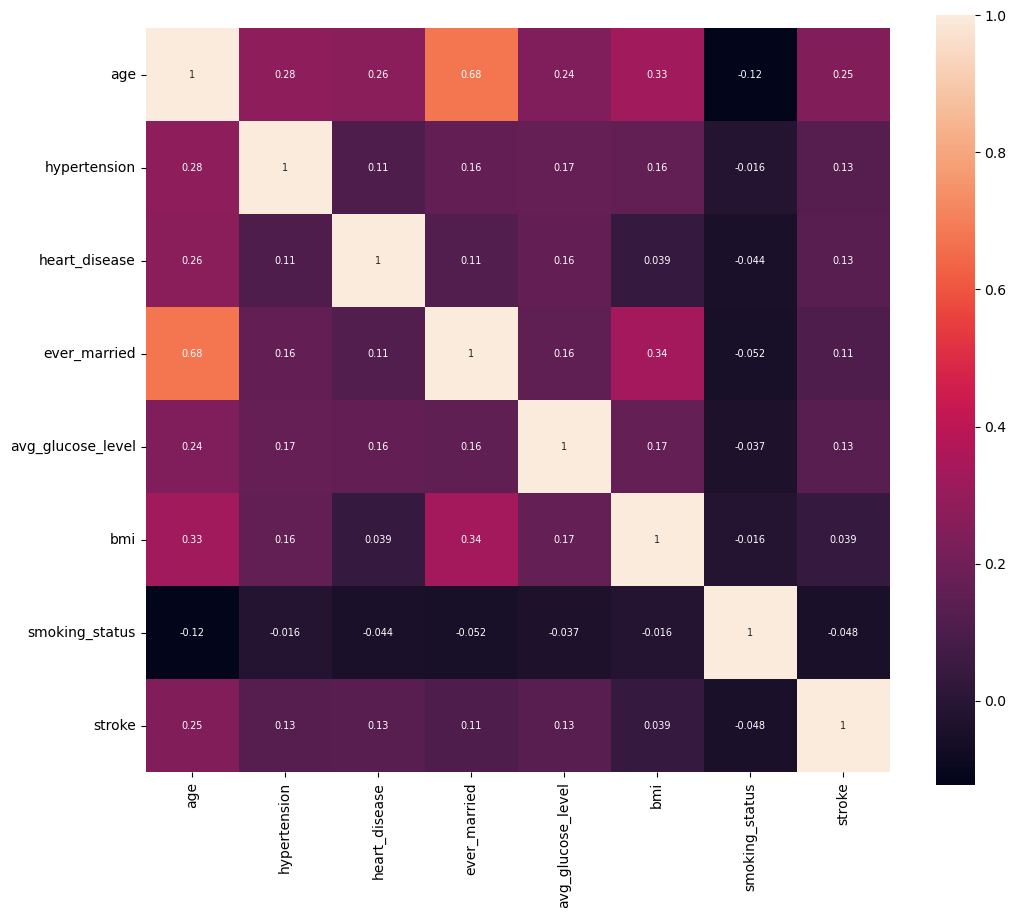

In [56]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
heart_stroke_corr = training_data.corr()
sns.heatmap(heart_stroke_corr,xticklabels=heart_stroke_corr.columns, yticklabels=heart_stroke_corr.columns, annot=True, annot_kws={"size": 7}, square=True)

<b>------------------------Feature Scaling-------------------------------</b>

In [36]:
# Standard Deviation for age, avg_glucose_level, bmi is very apart 
#training_data.describe()

# apply Scaling- Standardization 
#from sklearn.preprocessing import StandardScaler

# numerical features
#num_cols = ['age','avg_glucose_level', 'bmi']

# apply standardization on numerical features
#for col in num_cols:
    
    # fit on training data column
#    scale = StandardScaler().fit(training_data[[col]])
    
    # transform the training data column
#    training_data[col] = scale.transform(training_data[[col]])

<b>-----------------------------------------Checking Corelations---------------------------------------------<b>

<i>---------------------------------------Checking Correlation Maps---------------------------------</i>

<AxesSubplot:>

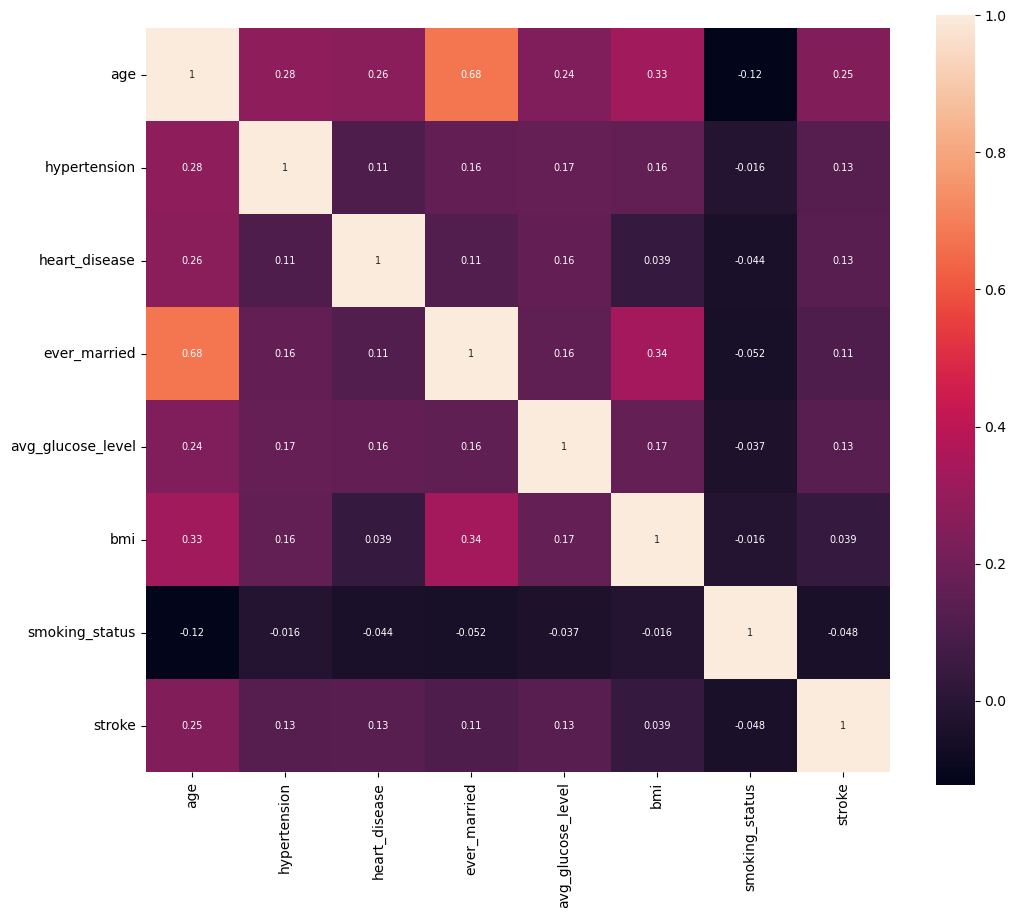

In [57]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
heart_stroke_corr = training_data.corr()
sns.heatmap(heart_stroke_corr,xticklabels=heart_stroke_corr.columns, yticklabels=heart_stroke_corr.columns, annot=True, annot_kws={"size": 7}, square=True)

<i>---------------------------------------Checking Effective Correlation---------------------------------</i>

In [58]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(training_data.drop('stroke',axis=1),training_data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(training_data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,326.799849
2,heart_disease,94.666779
4,avg_glucose_level,90.550026
1,hypertension,84.919947
3,ever_married,60.609558
6,smoking_status,11.589165
5,bmi,7.744511


In [59]:
#age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 50
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

0                  age
1         hypertension
2        heart_disease
3         ever_married
4    avg_glucose_level
Name: Attribute, dtype: object


<b>---------------------------------------------Building Decision Tree--------------------------------------------------</b>

<i>----------------------Splitting Data--------------------------------</i>

In [69]:
#split dataset in features and target variable
feature_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
target_names = ['stroke']
X = training_data[feature_cols] # Features
y = training_data.stroke # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

<i>----------------------Building Decision Tree Model--------------------------------</i>

In [70]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1234)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<i>----------------------Evaluating the Model--------------------------------</i>

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9099804305283757


<i>----------------------Visualising Decision Tree--------------------------------</i>

In [73]:
#text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1.07
|   |--- feature_0 <= 0.19
|   |   |--- feature_0 <= 0.06
|   |   |   |--- feature_4 <= -0.50
|   |   |   |   |--- feature_4 <= -0.50
|   |   |   |   |   |--- feature_4 <= -0.51
|   |   |   |   |   |   |--- feature_0 <= -1.85
|   |   |   |   |   |   |   |--- feature_0 <= -1.86
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -1.86
|   |   |   |   |   |   |   |   |--- feature_4 <= -0.70
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -0.95
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  -0.95
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  -0.70
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  -1.85
|   |   |   |   |   |   |   |--- feature_4 <= -0.53
|   |   |   |   |   |   |   |   |--- feature_4 <= -1.06
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -

In [74]:
fig = plt.figure(figsize=(100,90))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("heart_stroke_dt.png")